In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read edge list from .csv file
edge_list_file = 'Surat.csv'
G = nx.Graph()

# Read the edge list and create the graph
with open(edge_list_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row if present
    for row in reader:
        source = row[0]
        target = row[1]
        G.add_edge(source, target)

In [4]:
# Calculate the closeness centrality distribution
closeness_centralities = nx.closeness_centrality(G)
closeness_distribution = list(closeness_centralities.values())

# Remove nodes with closeness centrality equal to 0 or close to 0
to_remove = []
for node, closeness_centrality in closeness_centralities.items():
    if closeness_centrality <= 0.011:  # Threshold for close to 0 values
        to_remove.append(node)

G.remove_nodes_from(to_remove)

# Calculate the closeness centrality distribution after removal
closeness_centralities = nx.closeness_centrality(G)
closeness_distribution = list(closeness_centralities.values())


def x_to_100(x, pos):
    return '{:.1f}'.format(x)

NameError: name 'FuncFormatter' is not defined

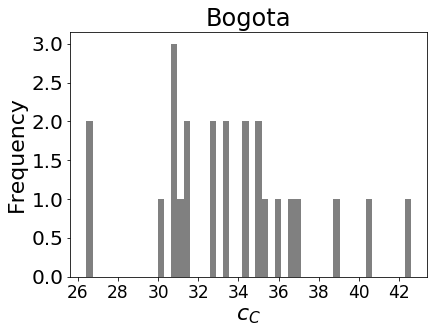

In [5]:
# Plot the density plot
plt.figure(figsize=(6.4, 4.5))
plt.title('Surat', fontsize=24)
plt.xlabel('$c_{C}$', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
plt.hist([val * 100 for val in closeness_distribution], density=False, bins=50, color='grey')

# Customize x-tick labels to display only three decimal places and divide by 100
formatter = FuncFormatter(x_to_100)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()